In [ ]:
AMANDEEP KAUR 
8896062

1.Using SciKit-Learn, train a logistic regression model on the Iris dataset. Use all four features. Define only 2 labels: virginica and non-virginica. See the logistic regression notebook presented in class for a demonstration on how to set up these labels

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,precision_recall_curve,precision_score,accuracy_score,confusion_matrix,f1_score,recall_score
import pandas as pd
import numpy as np
# Load the Iris dataset
iris = load_iris(as_frame=True) # as frame = True will enable to get the data in the form of pandas dataframe

# Extract features (X) and labels (y)
X = iris.data
y = iris.target

# Convert labels "setosa" and "versicolor" as one class, and "virginica" as another class
y[y != 2] = 0  # Set labels other than "virginica" as 0 (so iris setosa and versicolor is set to non virginica class (0))
y[y == 2] = 1  # Set "virginica" labels as 1

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 150, dtype: int32

In [7]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# checking the dependent feature's value count
pd.Series(y).value_counts()

target
0    100
1     50
Name: count, dtype: int64

In [10]:
# making the model fit
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# new prediction
y_pred = model.predict(X_test)

In [12]:
y_probs = model.predict_proba(X_test)
y_probs[:10]

# row 1 suggests that the model assigns a probability of approximately 0.8004 (80.04%) to class 0 
# and a probability of approximately 0.1996 (19.96%) to class 1

# For row 2
# suggests that the model assigns a very high probability (approximately 0.999994298 or 99.999%) to class 0
# and an extremely low probability (approximately 0.0000057019 or 0.00057%) to class 1

array([[8.00397233e-01, 1.99602767e-01],
       [9.99994298e-01, 5.70191129e-06],
       [1.46618716e-03, 9.98533813e-01],
       [7.92994822e-01, 2.07005178e-01],
       [7.24310548e-01, 2.75689452e-01],
       [9.99994189e-01, 5.81098859e-06],
       [9.83803900e-01, 1.61961003e-02],
       [1.79777747e-01, 8.20222253e-01],
       [7.27790745e-01, 2.72209255e-01],
       [9.68745254e-01, 3.12547458e-02]])

In [13]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([1.99602767e-01, 5.70191129e-06, 9.98533813e-01, 2.07005178e-01,
       2.75689452e-01, 5.81098859e-06, 1.61961003e-02, 8.20222253e-01,
       2.72209255e-01, 3.12547458e-02, 7.28197616e-01, 3.81722513e-06,
       1.98469717e-06, 4.55483771e-06, 4.12878974e-06, 2.79867261e-01,
       9.69923863e-01, 3.10811299e-02, 1.70670124e-01, 9.56114021e-01,
       7.52261030e-06, 5.72730459e-01, 8.96423650e-06, 9.46486929e-01,
       9.75413562e-01, 8.73922162e-01, 9.46563750e-01, 9.76302045e-01,
       5.79168878e-06, 7.70234558e-06])

In [15]:
# Indexing outcomes for [0]
y_probs_negative = y_probs[:,0]
y_probs_negative

array([0.80039723, 0.9999943 , 0.00146619, 0.79299482, 0.72431055,
       0.99999419, 0.9838039 , 0.17977775, 0.72779074, 0.96874525,
       0.27180238, 0.99999618, 0.99999802, 0.99999545, 0.99999587,
       0.72013274, 0.03007614, 0.96891887, 0.82932988, 0.04388598,
       0.99999248, 0.42726954, 0.99999104, 0.05351307, 0.02458644,
       0.12607784, 0.05343625, 0.02369795, 0.99999421, 0.9999923 ])

In [16]:
# Calculation False Positive Rate, True Positive Rate
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_probs_positive) 

Performing Cross Validation with scoring parameter as accuracy with 10 splits
In the below obsevation we can see that the model accuracy is dropping at 6th split.

In [17]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores

array([1.        , 1.        , 0.91666667, 1.        , 0.91666667,
       0.83333333, 1.        , 1.        , 1.        , 0.91666667])

In [18]:
print("The mean cross validation accuracy of the model is ",scores.mean())

The mean cross validation accuracy of the model is  0.9583333333333333


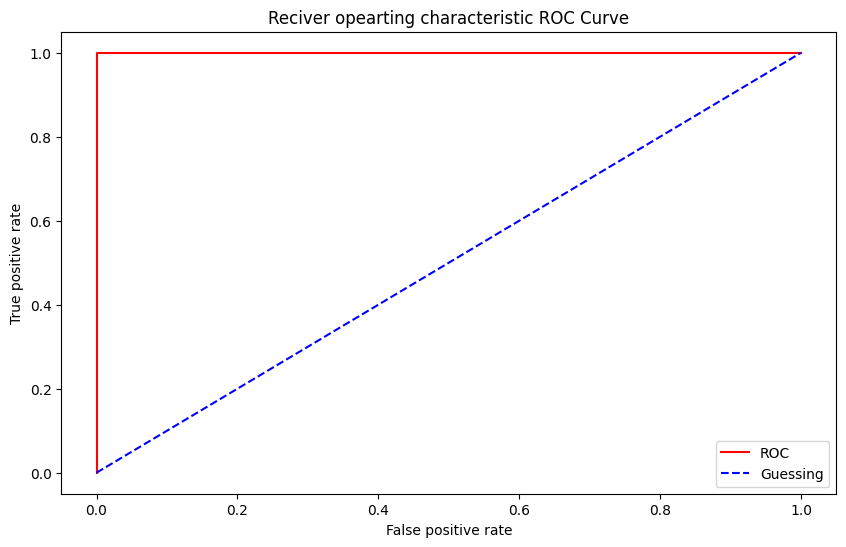

In [20]:
# create a fucntion for ROC curve
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
def auc_roc_curve(false_positive_rate,true_positive_rate):
    """
    Plots a ROC given the false positive rate fpr and a true positive rate tpr of a model"""
    plt.plot(false_positive_rate,true_positive_rate,color = "red",label = "ROC")
    plt.plot([0,1],[0,1],color = "blue",linestyle ="--",label = "Guessing")
    
    # cusotmize the plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Reciver opearting characteristic ROC Curve")
    plt.legend()
    plt.show()
auc_roc_curve(false_positive_rate,true_positive_rate)

In [22]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Confusion Matrix

In [23]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[19,  0],
       [ 0, 11]], dtype=int64)

From the above confusion matrix we can see that there are no false postives and false negatives
Classification report table

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Inferences:- From the above metrics we can easily see that the model is giving 100% prediction on all metrics. We can infer that the model is overfitting. The below are the reasons why I feel that the model is overfitting.

1.Insufficient Data: As our dataset is small there is a strong possibilty that the model has memorized the training samples instead of learning general patterns.

2.Imbalaned dependent variable: As in our dataset we have converted iris setosa and versicolor to non-virginica class, the dependent features is imbalanced. one class is significantly more prevalent than the other, the model is achieving high accuracy by simply predicting the majority class most of the time.